In [14]:
import numpy as np

data = np.load('data.npy')
target= np.load('target.npy')

In [15]:
data.shape

(329, 2500)

In [16]:
target.shape

(329,)

In [17]:
import collections
collections.Counter(target)

Counter({0: 92, 1: 128, 2: 109})

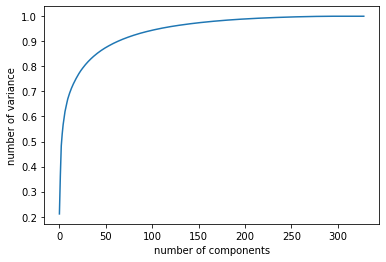

In [18]:
## how to decide c_components in PCA 

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

from matplotlib import pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('number of variance')

plt.show()

In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target,test_target = train_test_split(data, target, test_size= 0.1 )

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA #principal component analysis
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC()

model = make_pipeline(pca, svc)

model.fit(train_data, train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [21]:
predicted_target = model.predict(test_data)

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_target, predicted_target)
acc

0.9090909090909091

In [23]:
import joblib

joblib.dump(model, 'SVM_Face_Recognition.sav')

['SVM_Face_Recognition.sav']